**IMPORT LIBRARIES**



In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [35]:
df_Original = pd.read_csv('EV_Data.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = df_Original.copy()

In [6]:
df.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


**DATA PREPROCESSING**

In [7]:
df.isnull().sum()

Unnamed: 0                                                              0
Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of  EV would you prefer?                         0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV           

In [8]:
df.columns

Index(['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status',
       'Education', 'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [9]:
df.shape

(1000, 15)

In [10]:
#Data Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Unnamed: 0                                                            1000 non-null   int64  
 1   Age                                                                   1000 non-null   int64  
 2   City                                                                  1000 non-null   object 
 3   Profession                                                            1000 non-null   object 
 4   Marital Status                                                        1000 non-null   object 
 5   Education                                                             1000 non-null   object 
 6   No. of Family members                                                 1000 non-null   int64  
 7 

In [11]:
df['Age'].unique()

array([ 30,  27,  32,  55,  26,  28,  23,  25,  43,  59,  21,  29,  56,
        70,  50,  24,  61,  39,  31,  40,  18,  58,  22,  96,  64,  52,
        54,  42,  49,  57,  46,  36,  20,  19,  65,  17,  60,  44,  45,
        47,  82,  33,  37,  48,  69,  67,  86,  62,  66,  34,  63,  41,
        68,  16,  53,  15, 118,  38])

In [12]:
df['City'].unique()

array(['Nabha', 'Pune', 'Kashipur ', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani ', 'Nellore ', 'Pune ', 'Haldwani',
       'Banglore ', 'Faridabad ', 'Nagpur', 'Chandrapur ', 'Chennai',
       'Gurugram ', 'Nashik', 'Bengaluru', 'Mumbai ', 'Hakdwani',
       'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal', 'Rewari', 'New Delhi',
       'Serampore', 'Jhansi', 'New Delhi ', 'Jalandhar', 'Delhi ',
       'nashik'], dtype=object)

In [13]:
df["City"] = df["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df["City"] = df["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df["City"] = df["City"].replace({"Banglore ":"Bengaluru"})
df["City"] = df["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df["City"] = df["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df["City"] = df["City"].replace({"nashik":"Nashik"})

In [14]:
df['No. of Family members'].unique()

array([5, 4, 3, 2, 8, 6, 0, 1, 7])

In [15]:
df['How much money could you spend on an Electronic vehicle?'].unique()

array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '700000', '>25 lakhs',
       '2000000', '1200000', '1500000'], dtype=object)

In [16]:
df.columns

Index(['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status',
       'Education', 'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [17]:
df.drop('Unnamed: 0', axis=1, inplace = True)

**DATA VISUALIZATION**

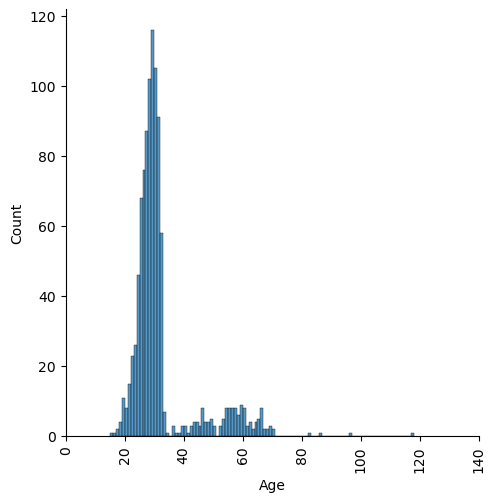

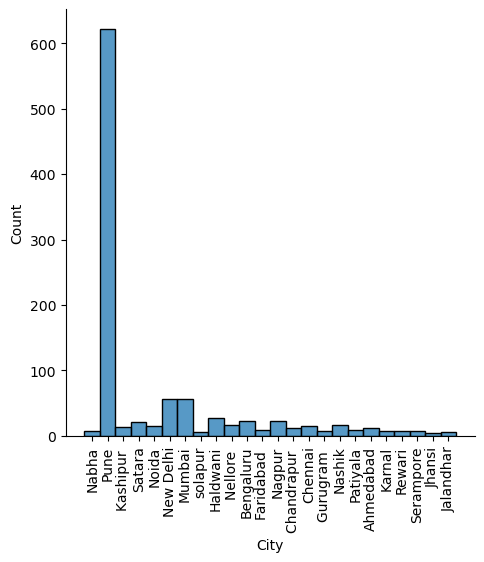

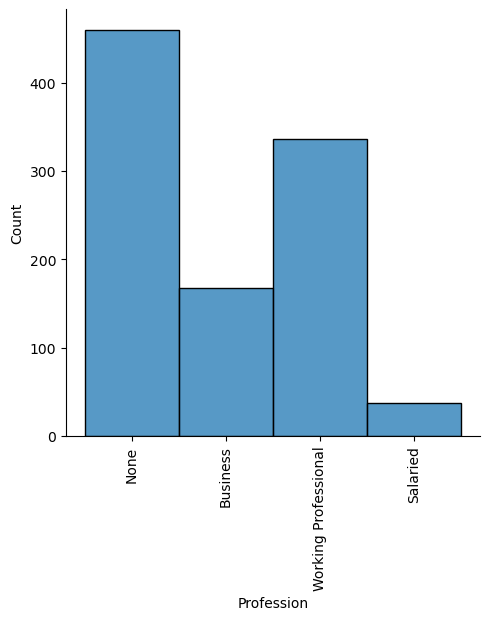

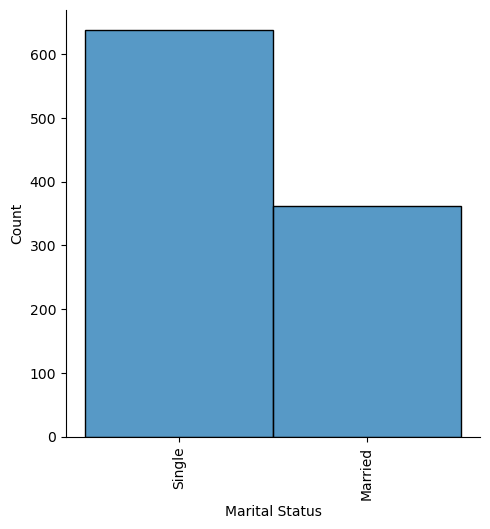

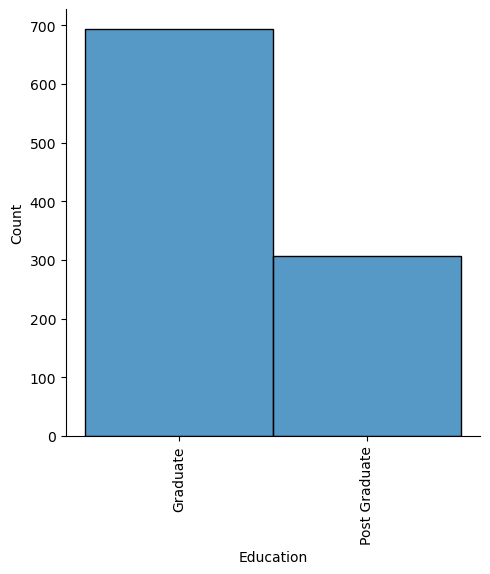

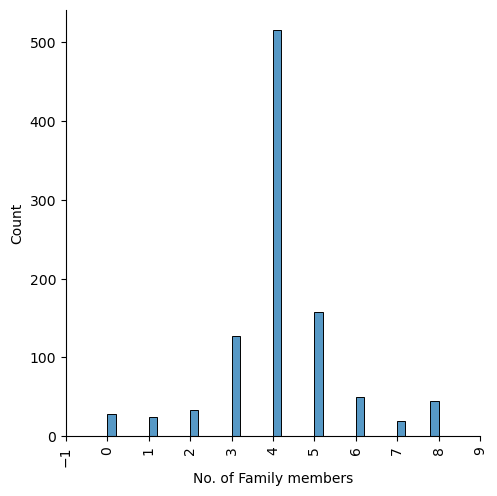

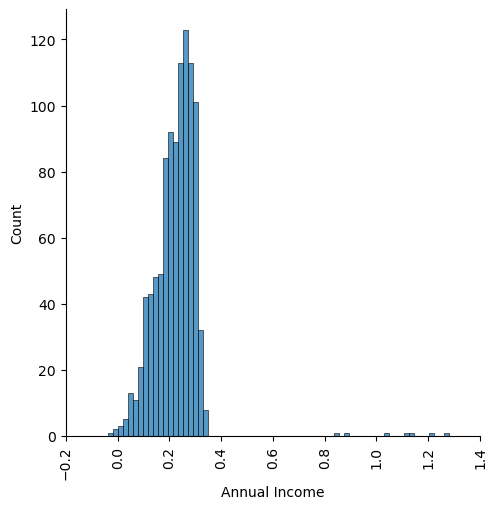

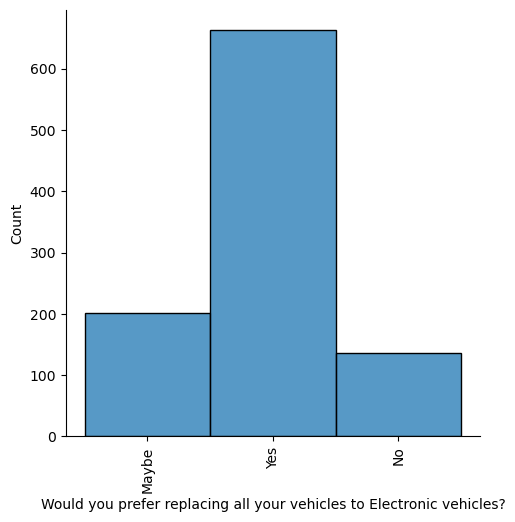

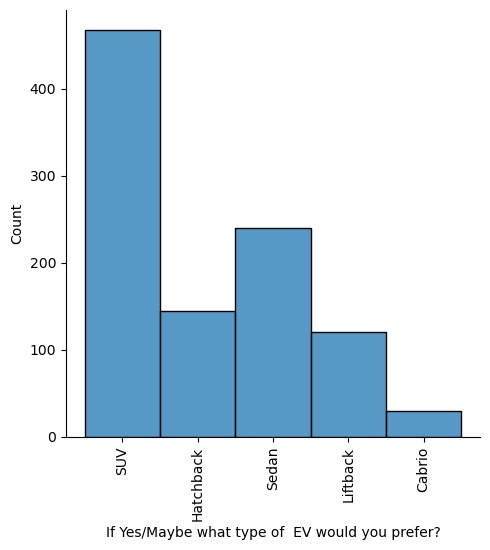

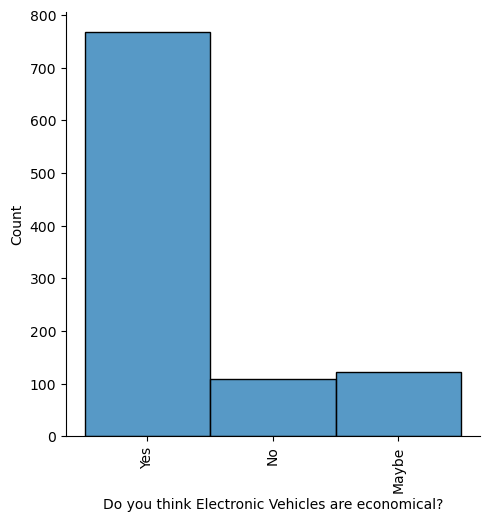

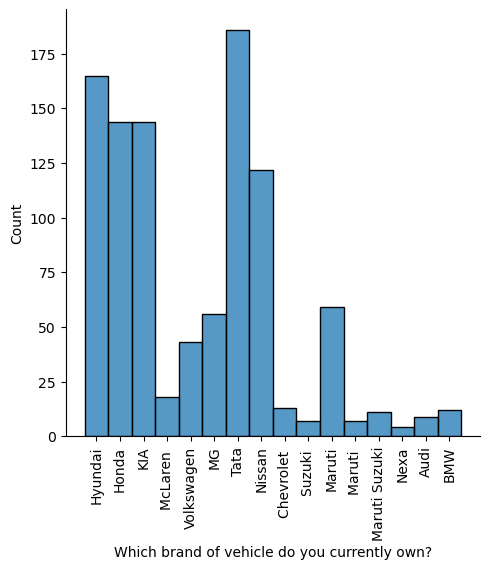

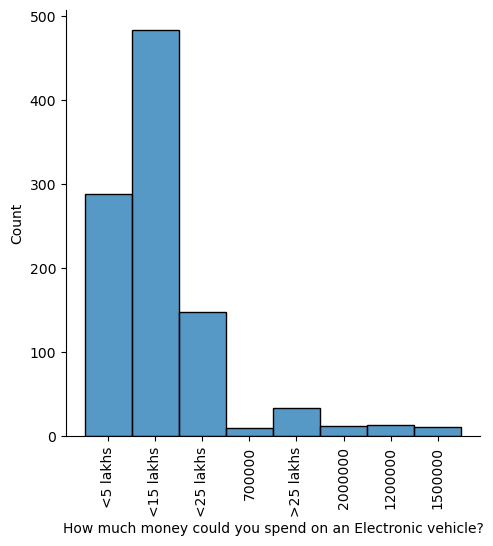

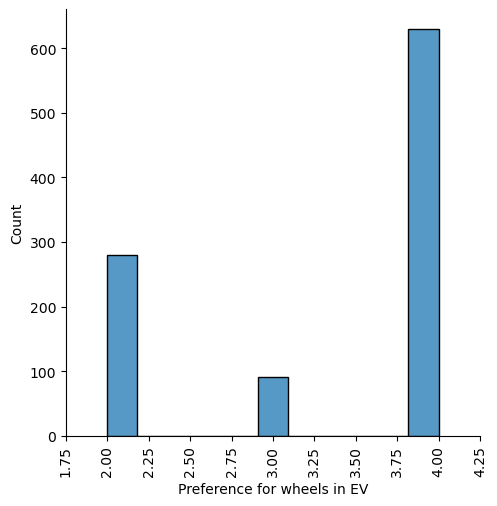

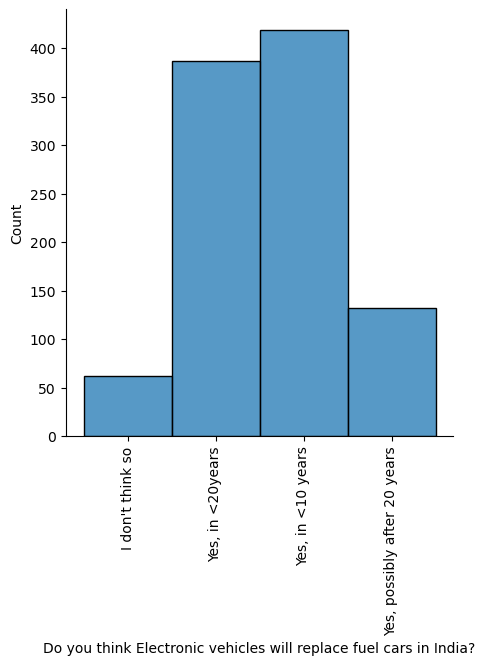

In [18]:
for col in df.columns:
    ax= sns.displot(df[col])
    ax.set_xticklabels(rotation=90)
    

In [19]:
#Most people prefer 4 wheels vehicle.
#Most people believe Electronic vehicle will replace fuel cars in India in less than 20 years.

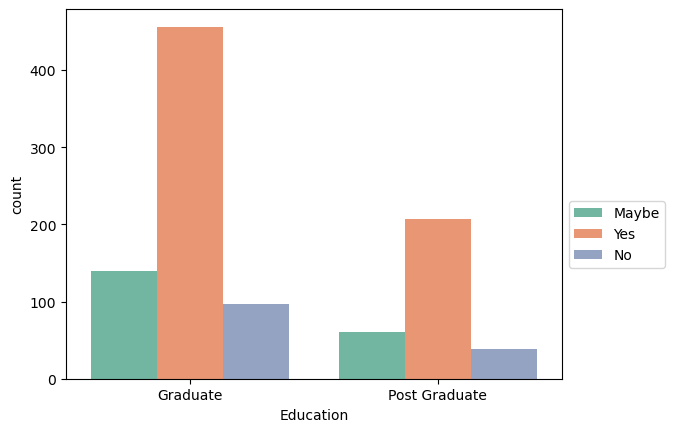

In [20]:
sns.countplot(x ='Education', hue = 'Would you prefer replacing all your vehicles to Electronic vehicles?',  data = df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

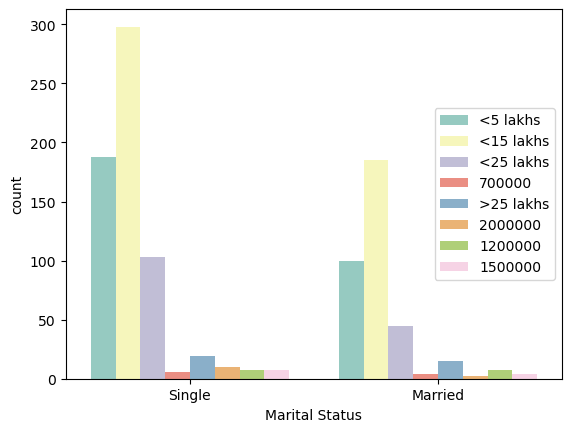

In [21]:
sns.countplot(x ='Marital Status', hue = 'How much money could you spend on an Electronic vehicle?',  data = df, palette = 'Set3')
plt.legend(loc='center right')
plt.show()

In [22]:
df.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000,1000.000,1000.000,1000.000
mean,31.800,4.118,2258341.824,3.349
std,11.295,1.470,999355.758,0.888
min,15.000,0.000,-376150.863,2.000
25%,26.000,4.000,1782115.520,2.000
50%,29.000,4.000,2329246.375,4.000
75%,31.000,5.000,2753169.612,4.000
max,118.000,8.000,12821282.030,4.000


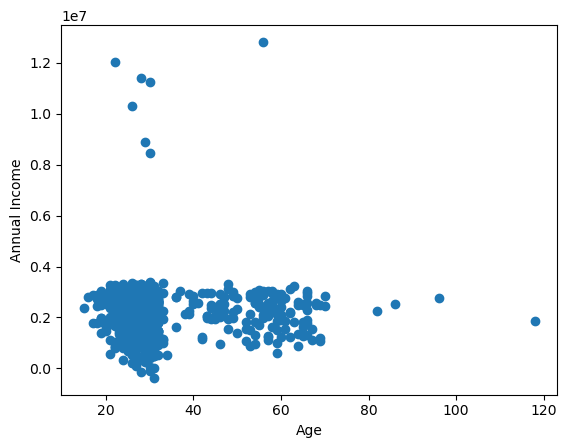

In [23]:
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.scatter(df['Age'],df['Annual Income'])

<AxesSubplot:xlabel='Age', ylabel='count'>

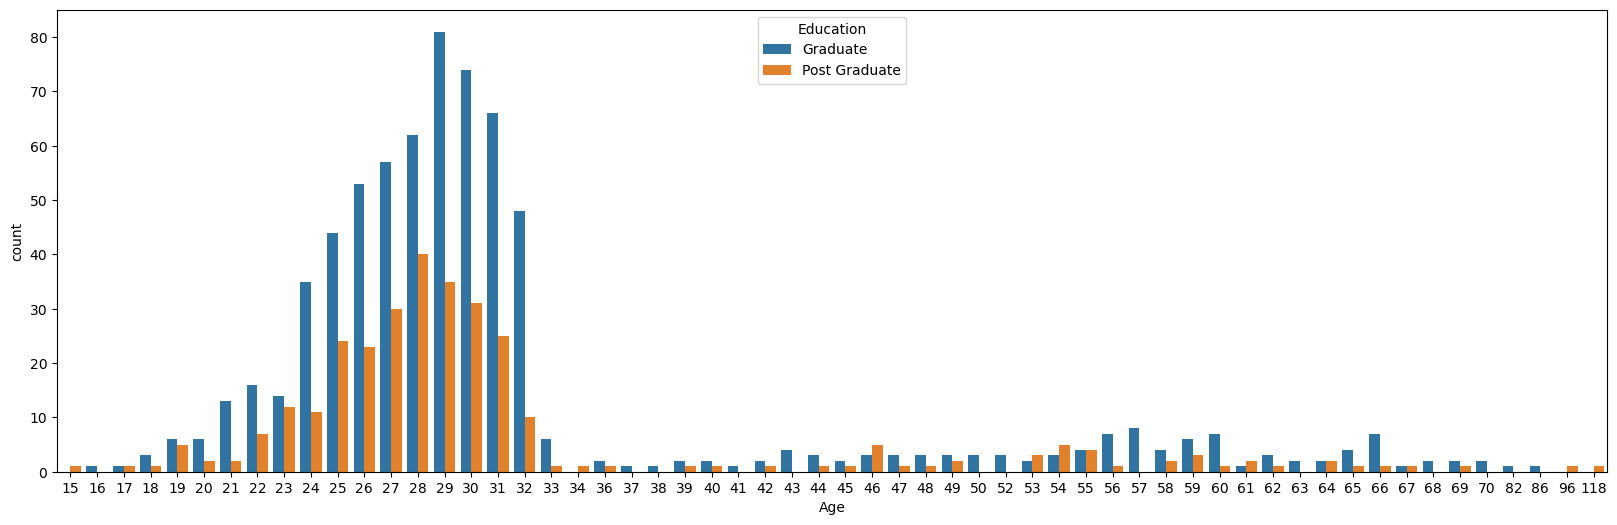

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=df, hue="Education")

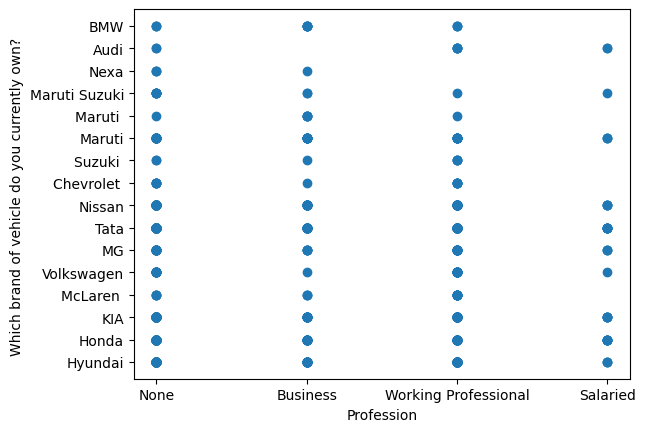

In [25]:
plt.xlabel('Profession')
plt.ylabel('Which brand of vehicle do you currently own? ')
plt.scatter(df['Profession'],df['Which brand of vehicle do you currently own?'])

<AxesSubplot:xlabel='Which brand of vehicle do you currently own?', ylabel='count'>

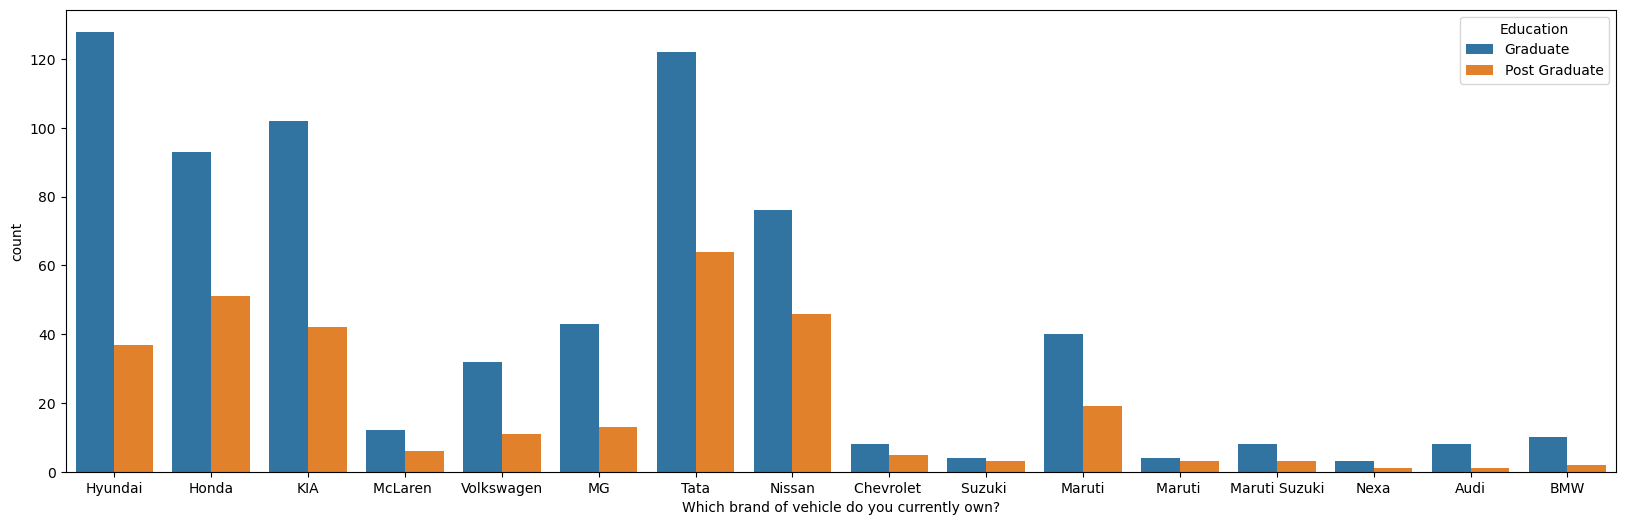

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(x="Which brand of vehicle do you currently own?", data=df, hue="Education")

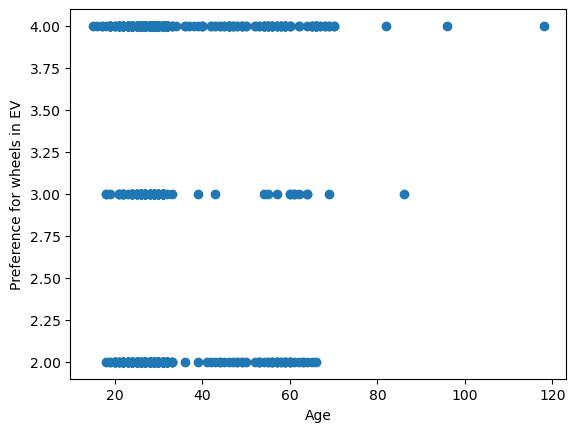

In [27]:
plt.xlabel('Age')
plt.ylabel('Preference for wheels in EV')
plt.scatter(df['Age'],df['Preference for wheels in EV'])

<AxesSubplot:>

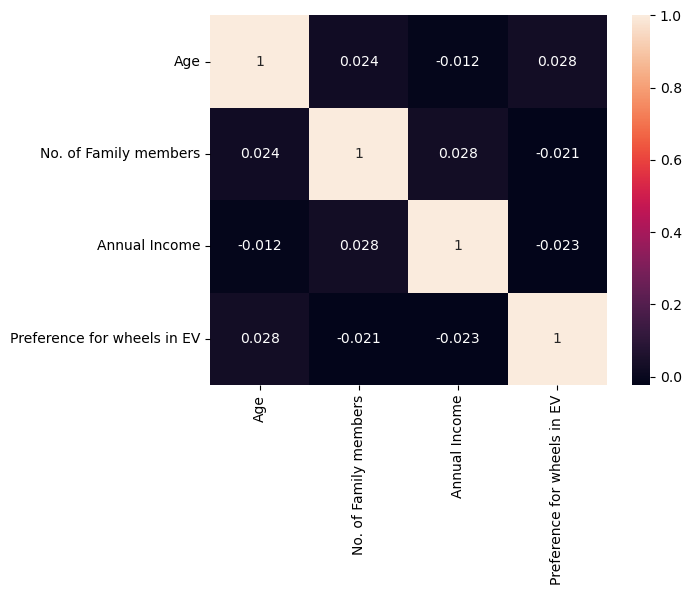

In [28]:
# Heatmap of Correlation
sns.heatmap(df.corr(), annot=True)

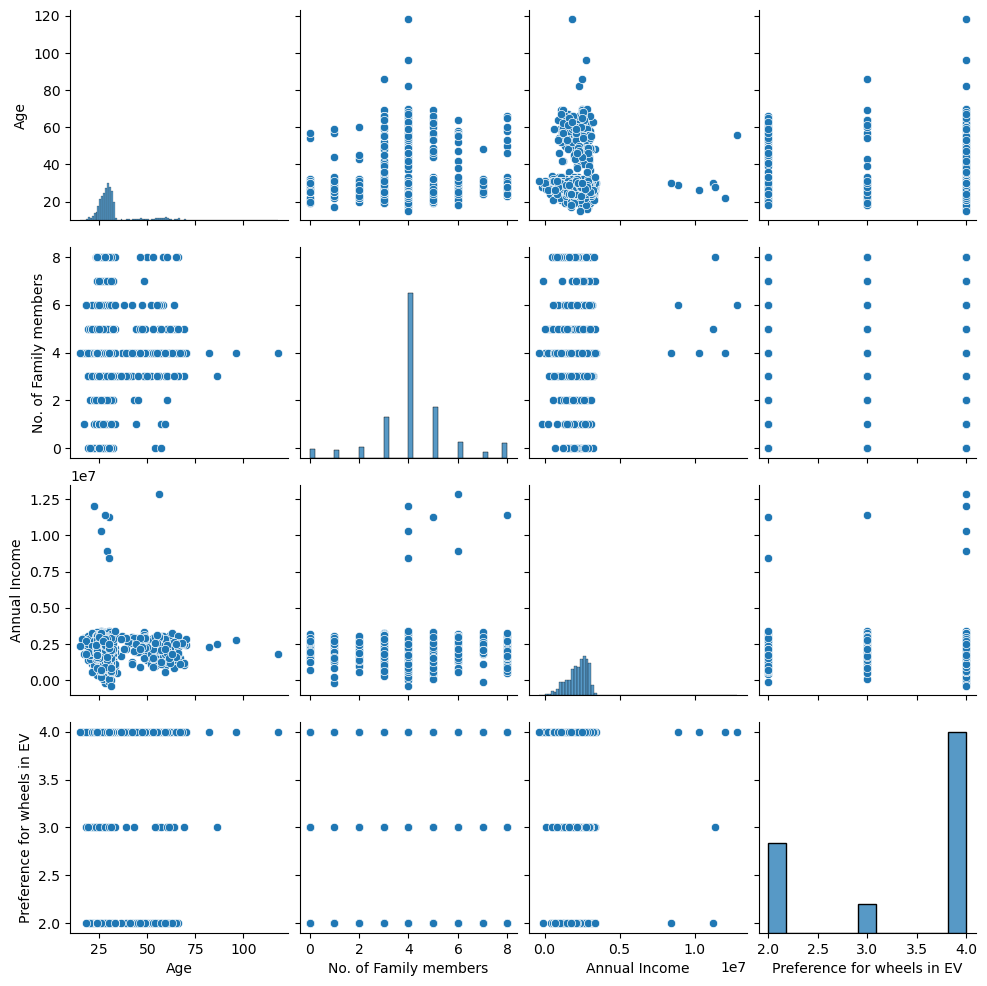

In [29]:
sns.pairplot(df)

In [30]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))

In [31]:
df.columns

Index(['Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [32]:
df['City']= label_encode(df,'City')
df['Profession']= label_encode(df,'Profession')
df['Marital Status']= label_encode(df,'Marital Status')
df['Education']= label_encode(df,'Education')
df['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encode(df,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df['If Yes/Maybe what type of  EV would you prefer?']= label_encode(df,'If Yes/Maybe what type of  EV would you prefer?')
df['Do you think Electronic Vehicles are economical?']= label_encode(df,'Do you think Electronic Vehicles are economical?')
df['Which brand of vehicle do you currently own?']= label_encode(df,'Which brand of vehicle do you currently own?')
df['Do you think Electronic vehicles will replace fuel cars in India?']= label_encode(df,'Do you think Electronic vehicles will replace fuel cars in India?')
df['How much money could you spend on an Electronic vehicle?']= label_encode(df,'How much money could you spend on an Electronic vehicle?')

In [33]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,12,1,1,0,5,1193875.647,0,3,2,4,6,2,0
1,27,19,1,1,0,4,1844540.398,2,3,2,3,4,4,2
2,32,10,1,1,0,4,2948150.113,2,1,2,5,4,4,2
3,55,19,0,1,0,3,2832379.739,0,1,1,4,6,4,1
4,26,21,1,1,0,4,2638750.576,2,4,2,10,4,4,2


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
y = df['City']
X = df.drop(['City'],axis=1,inplace = True)


In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df.iloc[:,:-1]


In [ ]:
calc_vif(X)

**VIF equal to 1 = variables are not correlated,
VIF between 1 and 5 = variables are moderately correlated,
VIF greater than 5 = variables are highly correlated**

**K MEANS MODEL**

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=28)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
km = KMeans(n_clusters=4, random_state=28)
clusters = km.fit_predict(df)
df["Cluster"] = clusters

df_Original["Cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income"][df.Cluster == 0], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income"][df.Cluster == 1], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income"][df.Cluster == 2], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income"][df.Cluster == 3], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('How much money could you spend on an Electronic vehicle?')
plt.show()

In [ ]:
df.head()

In [ ]:
df1=df_Original.copy()
df1

In [ ]:
df1["City"] = df1["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df1["City"] = df1["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df1["City"] = df1["City"].replace({"Banglore ":"Bengaluru"})
df1["City"] = df1["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df1["City"] = df1["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df1["City"] = df1["City"].replace({"nashik":"Nashik"})

In [ ]:
df1['Cluster'].value_counts() 

# More customers belong to **Cluster** **0 & 3**
## Cluster 2 & 1 has very less customers

In [ ]:
# Segregrating each cluster

Cluster_0 = df1[df1.Cluster==0]
Cluster_1 = df1[df1.Cluster==1]
Cluster_2 = df1[df1.Cluster==2]
Cluster_3 = df1[df1.Cluster==3]
Cluster_2.shape

In [ ]:
[Cluster_0['Age'].value_counts().head(3), 
 Cluster_1['Age'].value_counts().head(3), 
 Cluster_2['Age'].value_counts().head(3), 
 Cluster_3['Age'].value_counts().head(3)]

# Based on Cluster 0 & 3, Age group of **28-31** are to be targeted

In [ ]:
[Cluster_0['City'].value_counts().head(),
 Cluster_1['City'].value_counts().head(), 
 Cluster_2['City'].value_counts().head(), 
 Cluster_3['City'].value_counts().head()]

In [ ]:
#Pune & Mumbai are present in all the clusters, 
#New Delhi & Haldwani are present in 3 of 4 clusters,
#Satara & Bengaluru are present in 1 of the 4 clusters.

# 1. **'Pune' & 'Mumbai'** are the most suitable location to create the early market in EV segment.
## 2. **'New Delhi' & 'Haldwani'** should be next priority.
## 3. Followed by **'Satara' & 'Bengaluru'**.

> ***The City should also have enough charging stations, will try to analyse Sanctioned Charging stations in India Dataset.***

In [ ]:
[Cluster_0['Profession'].value_counts().head(), 
 Cluster_1['Profession'].value_counts().head(), 
 Cluster_2['Profession'].value_counts().head(), 
 Cluster_3['Profession'].value_counts().head()]

****Salaried people are very less interested in EV vehicles.****

In [ ]:
[Cluster_0['Annual Income'].mean(), 
 Cluster_1['Annual Income'].mean(), 
 Cluster_2['Annual Income'].mean(), 
 Cluster_3['Annual Income'].mean()]

# **Cluster 0** customers have **Higher Average Income(Rs. 2812149.76)**, Cluster 1 & 2 have lower Average Income

In [ ]:
[Cluster_0['Marital Status'].value_counts().head(), 
 Cluster_1['Marital Status'].value_counts().head(), 
 Cluster_2['Marital Status'].value_counts().head(), 
 Cluster_3['Marital Status'].value_counts().head()]

In [ ]:
m=Cluster_3[Cluster_3['Marital Status']=='Single']
m['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

# **Single** Marital Status people should be Targeted

In [ ]:
[Cluster_0['No. of Family members'].value_counts().head(), 
 Cluster_1['No. of Family members'].value_counts().head(), 
 Cluster_2['No. of Family members'].value_counts().head(), 
 Cluster_3['No. of Family members'].value_counts().head()]

# Family with **3-5** members are more interested in EV.

In [ ]:
[Cluster_0['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_1['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_2['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_3['Which brand of vehicle do you currently own?'].value_counts().head()]

# **Tata,Hyundai,Honda,KIA are the Brands that Customers own most.**

## *After having discussions with Automobile Domain Experts. Below is the details about what each brand is well known for,*
### *Tata - Robust, Safety, Affordable*
### *Hyundai - Unique design, Comfort*
### *Honda - Durability, Performance*
### *KIA - Innovative Features, efficiency.*

In [ ]:
[Cluster_0['Education'].value_counts().head(),
 Cluster_1['Education'].value_counts().head(), 
 Cluster_2['Education'].value_counts().head(), 
 Cluster_3['Education'].value_counts().head()]

In [ ]:
e=Cluster_3[Cluster_3['Education']=='Graduate']
e['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

In [ ]:
y= df_Original['Would you prefer replacing all your vehicles to Electronic vehicles?']
z=df_Original['Cluster']
x = list(zip(y, z))

i = pd.DataFrame(x,columns=['Would you prefer replacing all your vehicles to Electronic vehicles?', 'Cluster'])
(i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Yes').sum() + (i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Maybe').sum()

**864 customers out of 1000 are intersted in EV.**

# **Graduates** are more interested in replacing vehicles to EV

In [ ]:
print(Cluster_0['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_1['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_2['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_3['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))

# People are more interested in buying **SUV**'s, followed by **Sedan** and **Hatchback** in EV Segments

In [ ]:
print(Cluster_0['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_1['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_2['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_3['How much money could you spend on an Electronic vehicle?'].value_counts().head())

In [ ]:
#Cluster 0 & 3 have more number of customers(770). Condidering only 0 & 3 clusters,

#378 out of 770 that is 49.09% of people only wants to spend <15 lakhs for EV.
#232 out of 770 that is 30.12% of people only wants to spend <5 lakhs.
#118 out of 770 that is 15.32% of people only wants to spend <25 lakhs.


* **49.09% of people only wants to spend <15 lakhs for EV**
* **Only 5.47% of people willing to spend more than 25 lakhs.**

## By this,we can infer most customers want to invest **less than 15 lakhs** for their EV. 
## Considering SUV, Sedan and Hatchback as most preferred vehicle type.
> # Interestingly, Considering the money Customers can spend on EV and manufacturing cost for the company wrt. different EV types.
> # Company should focus on making '**Sedan**' in price range **less than 15 lakhs**.
>  ***If company wants to make SUV's, only 15.32% of customers are willing to pay more than 15 lakhs.***

# Analysis on Active Vehicles as on 08.12.2021 in India

In [ ]:
Active_EVs = pd.read_csv('/kaggle/input/ev-data/Active_EVs.csv')
Active_EVs.head()

In [ ]:
Active_EVs.isnull().sum()

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
f = sns.barplot(y=Active_EVs['State/UT'], x=Active_EVs['Total Number of active Vehicle as on 08.12.2021'])
plt.title('State wise active vehicle')
plt.show()


plt.rcParams['figure.figsize'] = (20, 10)
f = sns.barplot(y=Active_EVs['State/UT'], x=Active_EVs['Total number of active Electric Vehicles as on 08.12.2021'])
plt.title('State wise active vehicle')
plt.show()

In [ ]:
sns.lmplot(data=Active_EVs, y="Total number of active Electric Vehicles as on 08.12.2021", x="Total Number of active Vehicle as on 08.12.2021", hue='State/UT')
plt.title('Total Active Vehecles Vs Total active EVs')

sns.lmplot(data=Active_EVs, y="Total number of active Electric Vehicles as on 08.12.2021", x="Total Number of active Vehicle as on 08.12.2021")
plt.title('Total Active Vehecles Vs Total active EVs')

# Analysis on Statewise charging station

In [ ]:
Statewise_CS = pd.read_excel('/kaggle/input/ev-data/Charging_station_statewise.xlsx')
Statewise_CS.head()

In [ ]:
Statewise_CS.info()

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize =(14, 10))

# Horizontal Bar Plot
ax.barh(Statewise_CS['State/UT'], Statewise_CS['No. of EV Charging station Sanctioned'],color ='indigo')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='light',
             color ='black')

# Add Plot Title
ax.set_title('NUMBER OF EV CHARGING STATION STATEWISE',
             loc ='left',fontsize = 16)

# Show Plot
plt.show()


# Analysis on Citywise charging station

In [ ]:
Citywise_CS= pd.read_excel("/kaggle/input/ev-data/Charging_station_citywise.xlsx")
Citywise_CS.tail()

In [ ]:
Citywise_CS.drop(Citywise_CS.index[15], inplace= True)
Citywise_CS.tail()

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 12))

#  Bar Plot
ax.bar(Citywise_CS['City'], Citywise_CS['Charging Stations'], color ='lightcoral')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
#ax.invert_yaxis()

# Add annotation to bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    

# Add Plot Title
ax.set_title('NUMBER OF EV CHARGING STATION CITYWISE',
             loc ='center',fontsize = 16)

# Show Plot
plt.show()

# Analysis on Highway wise charging station

In [ ]:
Highwise_CS= pd.read_csv('/kaggle/input/ev-data/Highwise_charging_station.csv',encoding='cp1252')
Highwise_CS.tail()

In [ ]:
Highwise_CS.drop(Highwise_CS.index[25], inplace= True)
Highwise_CS.tail()

In [ ]:
Highwise_CS.isnull().sum()

In [ ]:
sns.barplot(x=Highwise_CS["EV Charging Stations Sanctioned"], y=Highwise_CS['Expressways/Highways'] , hue=Highwise_CS["Category"])

# Demographic segments

## -Age
**Target Age group of 28-31**

## -Income
**Target who earn Rs. 20,64,995 to Rs. 28,12,149 per year. **

## -Education
**Target Graduates.**


# Geographic segments

## - Location
   **Pune, Mumbai, New Delhi, Bengaluru Considering based on Segmentation Analysis and the Infrastructres sanctioned by Govt.**


# Psychographic segments

## -Lifestyle
**Target Single Marital Status, Family with 3-5 members**